# Goals of this workbook

The purpose of this workbook is to analyze seasonal trends and search patterns for keywords related to corporate events and celebrations in Germany. By examining the search behavior over time, I aim to identify specific months or periods with peak interest, which can provide valuable insights into event planning and market demand.

# Data 

For the trend analysis I brainstormed common keywords and exported Google Trends Data for these terms from https://trends.google.de/trends/. As the data came in separate csv documents due to 1 download for each keyword, I combined the values in one Excel sheet for each of the two data types.

1) Google-Trends-Analysis-Keywords.cs: Shows the usage of the keywords over time (how often a keyword has been searched) in Germany within the last 5 years (called "observations"). Since it contains weekly data, there is only one date every 7 days noted in the document. I added the keywords manually, as the keyword was only part of the document name before.
2) Google-Trends-Analysis-Keywords_geoMap.csv: Shows the number of usages for each keyword per federal state. It only contains one summed up number for the last 5 years in Germany.  

# Preparation

## Imports

In [3]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import data into pandas DataFrames
trends = pd.read_csv('/kaggle/input/google-trends-analysis-company-events-keywords/Google-Trends-Analysis-Keywords.csv')
geotrends = pd.read_csv('/kaggle/input/google-trends-analysis-company-events-keywords/Google-Trends-Analysis-Keywords_geoMap.csv')

## Data Cleanup

In [4]:
# clean up date data types
trends['date'] = pd.to_datetime(trends['date'])


In [5]:
# checking the values in the geotrends df to find wrong values (<1)
print(geotrends['observations'].value_counts())

observations
100    20
57     12
50     12
36     11
25     10
60      9
64      9
56      8
71      7
80      7
68      7
62      6
72      6
42      5
75      5
65      5
14      5
33      5
63      5
37      5
85      4
90      4
84      4
45      4
81      3
77      3
16      3
61      3
52      3
47      3
76      3
54      2
28      2
91      2
70      2
74      2
96      2
92      2
66      2
59      2
18      1
27      1
67      1
69      1
43      1
<1      1
55      1
83      1
95      1
88      1
Name: count, dtype: int64


In [6]:
# handle missing and wrong values in observations column
geotrends['observations'] = geotrends['observations'].fillna(0)
geotrends['observations'] = geotrends['observations'].replace('<1',0)
geotrends['observations'] = geotrends['observations'].astype(int)

In [7]:
trends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3930 entries, 0 to 3929
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          3930 non-null   datetime64[ns]
 1   observations  3930 non-null   int64         
 2   keyword       3930 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 92.2+ KB


In [8]:
geotrends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   region        240 non-null    object
 1   observations  240 non-null    int64 
 2   keyword       240 non-null    object
dtypes: int64(1), object(2)
memory usage: 5.8+ KB


# Visualizations for understanding data 

- exploring the data in visualizations to see, if there is more general cleanup needed
- trends.info DataFrame

In [9]:
# step 1: create a 'month_year' column with only the year and month (YYYY-MM)
trends['month_year'] = trends['date'].dt.to_period('M').astype(str)

# verify the new column
print(trends[['date', 'month_year']].head())

        date month_year
0 2019-12-15    2019-12
1 2019-12-22    2019-12
2 2019-12-29    2019-12
3 2020-01-05    2020-01
4 2020-01-12    2020-01


In [10]:
# Group data by 'month_year' and 'keyword'
grouped_data = trends.groupby(['month_year', 'keyword'], as_index=False)['observations'].sum()

# Ensure 'month_year' is datetime for proper sorting
grouped_data['month_year'] = pd.to_datetime(grouped_data['month_year'], format='%Y-%m')

# verify the grouped data
print(grouped_data.head())

  month_year          keyword  observations
0 2019-12-01    betriebsfeier           159
1 2019-12-01  christmas party           141
2 2019-12-01    company party             0
3 2019-12-01  corporate event             0
4 2019-12-01    event agentur            48


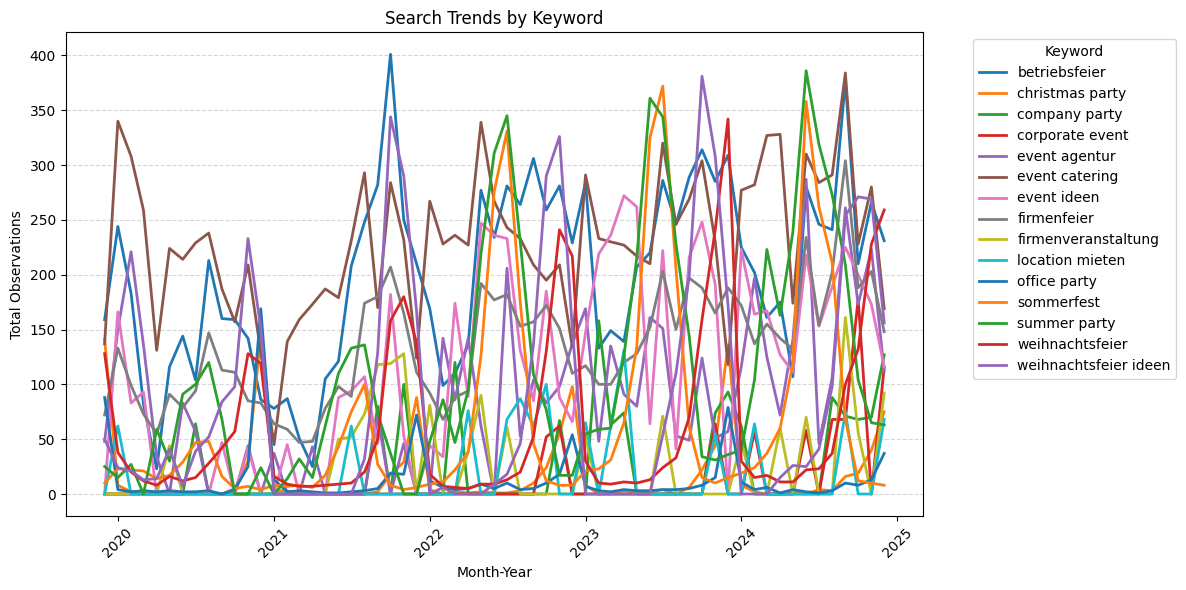

In [11]:
# Plot all keywords on one graph
plt.figure(figsize=(12, 6))
for keyword, keyword_data in grouped_data.groupby('keyword'):
    plt.plot(keyword_data['month_year'], keyword_data['observations'], label=keyword, linewidth=2)

# Customize plot
plt.title('Search Trends by Keyword')
plt.xlabel('Month-Year')
plt.ylabel('Total Observations')
plt.xticks(rotation=45)
plt.legend(title='Keyword', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Show plot
plt.show()

As we can see there is a lot of data hence we compare many keywords. To create a better overview, I will have to aggregate the keywords. Possible solutions are:

1) connect translations
2) connect keywords in each category

But lets have a look to the total usage of the keywords over the whole time first.

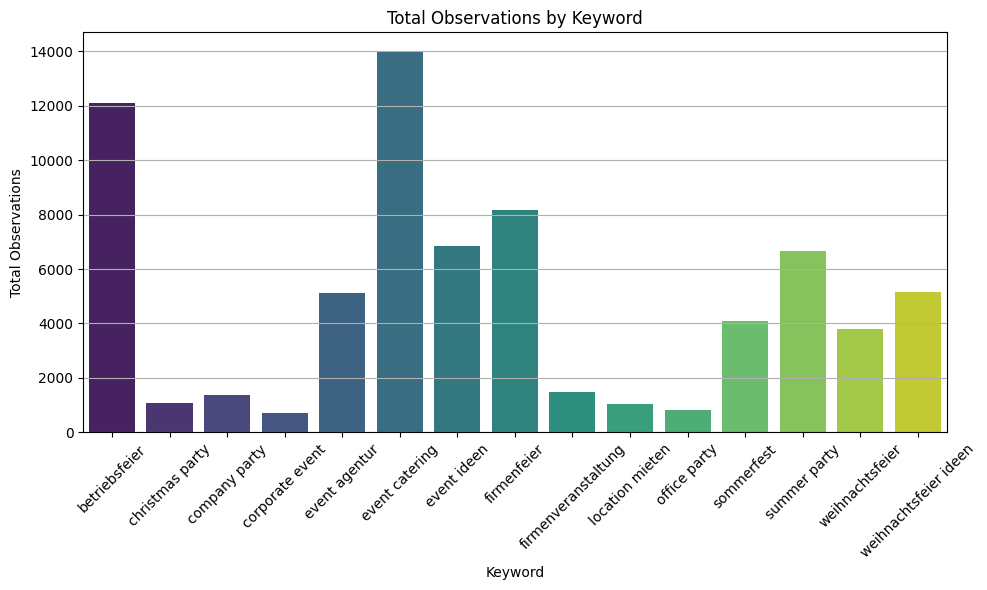

In [12]:
# Group data by keyword and sum observations
total_observations = trends.groupby('keyword')['observations'].sum().reset_index()

# Plot a bar chart of total observations by keyword
plt.figure(figsize=(10, 6))
sns.barplot(data=total_observations, x='keyword', y='observations', palette='viridis')
plt.title('Total Observations by Keyword')
plt.xlabel('Keyword')
plt.ylabel('Total Observations')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

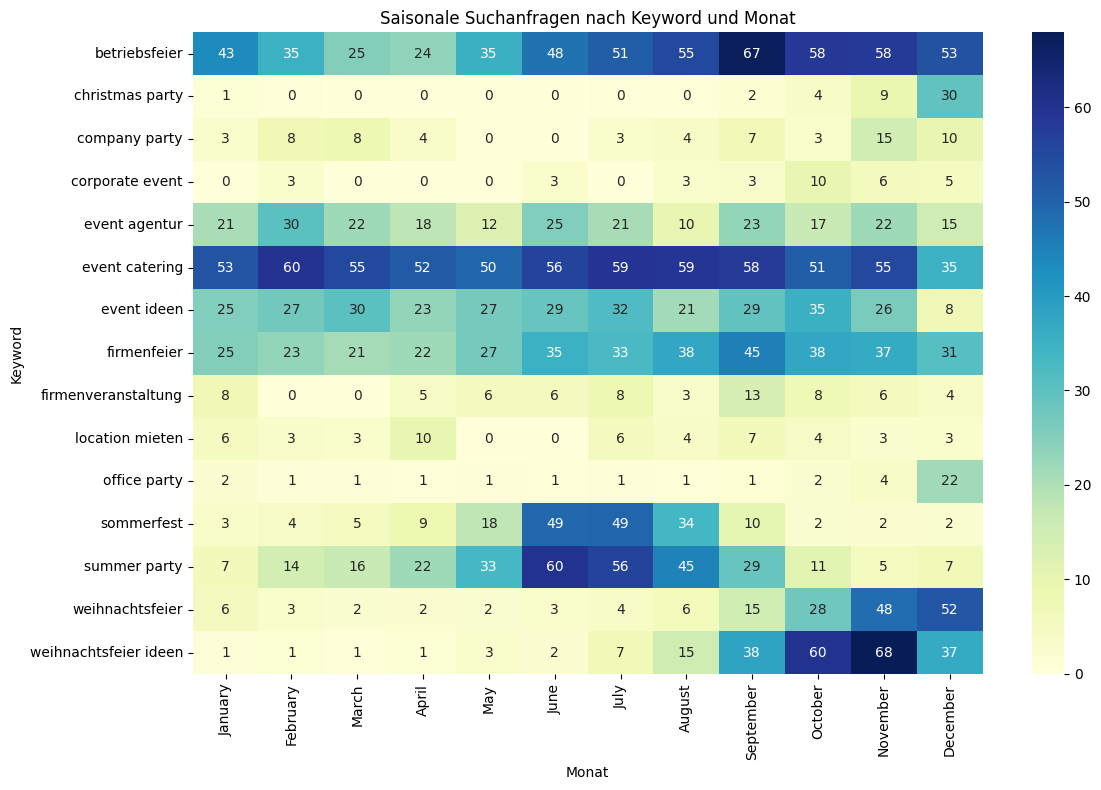

In [15]:
# Pivot-Tabelle erstellen: Keywords x Monate
heatmap_data = trends.pivot_table(index=trends['keyword'], 
                                  columns=trends['month_name'], 
                                  values='observations', 
                                  aggfunc='mean')

# Monatsreihenfolge sortieren
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
heatmap_data = heatmap_data[month_order]

# Plot: Heatmap der Suchanfragen
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.0f')

plt.title('Saisonale Suchanfragen nach Keyword und Monat')
plt.xlabel('Monat')
plt.ylabel('Keyword')
plt.tight_layout()
plt.show()


This heatmap shows trends over the year really well. As there is still keywords listed which are not correlated to company events, this visualization is still too large and does not focus on the imortant keywords.

As mentioned before, I will cut down the keywords.

# Optimizing data
## Cutting down keywords by translation

In [111]:
# Mapping of translations (English -> German equivalents or vice versa)
keyword_mapping = {
    'summer party': 'sommerfest/summer party',
    'sommerfest': 'sommerfest/summer party',
    'company party': 'firmenfeier/company party',
    'office party': 'firmenfeier/company party',
    'christmas party': 'weihnachtsfeier/christmas party',
    'weihnachtsfeier': 'weihnachtsfeier/christmas party',
    'corporate event': 'firmenveranstaltung/corporate event',
    'firmenveranstaltung': 'firmenveranstaltung/corporate event',
    'firmenfeier': 'firmenfeier/company party',
    'betriebsfeier': 'firmenfeier/company party'
}

# create a new DataFrame for the aggregated keywords version
trends_agg = trends
geotrends_agg = geotrends

# apply the mapping to the 'keyword' column
trends_agg['keyword'] = trends_agg['keyword'].replace(keyword_mapping)
geotrends_agg['keyword'] = geotrends_agg['keyword'].replace(keyword_mapping)

# verify the replacements
print("Unique keywords after merging translations:")
print(trends_agg['keyword'].unique())
print(geotrends_agg['keyword'].unique())

# aggregate the observations after merging
trends_agg_grouped = trends_agg.groupby(['date', 'keyword'])['observations'].sum().reset_index()
geotrends_agg_grouped = geotrends_agg.groupby(['region', 'keyword'])['observations'].sum().reset_index()

# display the grouped data
print(trends_agg_grouped.head(10))
print(geotrends_agg_grouped.head(10))

Unique keywords after merging translations:
['firmenfeier/company party' 'weihnachtsfeier/christmas party'
 'sommerfest/summer party' 'firmenveranstaltung/corporate event'
 'event ideen' 'location mieten' 'event catering' 'event agentur'
 'weihnachtsfeier ideen']
['firmenfeier/company party' 'weihnachtsfeier/christmas party'
 'sommerfest/summer party' 'firmenveranstaltung/corporate event'
 'event ideen' 'location mieten' 'event catering' 'event agentur'
 'weihnachtsfeier ideen']
        date                              keyword  observations
0 2019-12-15                        event agentur            48
1 2019-12-15                       event catering            64
2 2019-12-15                          event ideen             0
3 2019-12-15            firmenfeier/company party           200
4 2019-12-15  firmenveranstaltung/corporate event             0
5 2019-12-15                      location mieten             0
6 2019-12-15              sommerfest/summer party             3
7 20

## Creating groups of keywords

Since there are still many keywords left, I will further merge the keywords to the groups "general company keywords", "general keywords", "summer party keywords" and "christmas party keywords". This is legitimate because it is not important which exact keywords are used - as we rather want to find general seasonal trends for company events.


In [126]:
# add a column with keyword group for each category
trends_agg_grouped.loc[trends_agg_grouped['keyword'].isin(['firmenfeier/company party', 'firmenveranstaltung/corporate event']), 'keyword_group'] = 'General Company Keywords'
trends_agg_grouped.loc[trends_agg_grouped['keyword'].isin(['sommerfest/summer party']), 'keyword_group'] = 'Summer Party Keywords'
trends_agg_grouped.loc[trends_agg_grouped['keyword'].isin(['weihnachtsfeier ideen', 'weihnachtsfeier/christmas party']), 'keyword_group'] = 'Christmas Party Keywords'
trends_agg_grouped.loc[trends_agg_grouped['keyword'].isin(['event agentur', 'event catering', 'event ideen', 'location mieten']), 'keyword_group'] = 'General Keywords'

geotrends_agg_grouped.loc[geotrends_agg_grouped['keyword'].isin(['firmenfeier/company party', 'firmenveranstaltung/corporate event']), 'keyword_group'] = 'General Company Keywords'
geotrends_agg_grouped.loc[geotrends_agg_grouped['keyword'].isin(['sommerfest/summer party']), 'keyword_group'] = 'Summer Party Keywords'
geotrends_agg_grouped.loc[geotrends_agg_grouped['keyword'].isin(['weihnachtsfeier ideen', 'weihnachtsfeier/christmas party']), 'keyword_group'] = 'Christmas Party Keywords'
geotrends_agg_grouped.loc[geotrends_agg_grouped['keyword'].isin(['event agentur', 'event catering', 'event ideen', 'location mieten']), 'keyword_group'] = 'General Keywords'

# control print
print(trends_agg_grouped['keyword_group'].value_counts())
print(trends_agg_grouped[['keyword', 'keyword_group']].drop_duplicates())

print(geotrends_agg_grouped['keyword_group'].value_counts())
print(geotrends_agg_grouped[['keyword', 'keyword_group']].drop_duplicates())

keyword_group
General Keywords            1048
General Company Keywords     524
Christmas Party Keywords     524
Summer Party Keywords        262
Name: count, dtype: int64
                               keyword             keyword_group
0                        event agentur          General Keywords
1                       event catering          General Keywords
2                          event ideen          General Keywords
3            firmenfeier/company party  General Company Keywords
4  firmenveranstaltung/corporate event  General Company Keywords
5                      location mieten          General Keywords
6              sommerfest/summer party     Summer Party Keywords
7                weihnachtsfeier ideen  Christmas Party Keywords
8      weihnachtsfeier/christmas party  Christmas Party Keywords
keyword_group
General Keywords            64
General Company Keywords    32
Christmas Party Keywords    32
Summer Party Keywords       16
Name: count, dtype: int64
              

## Creating column: month for seasonal data

In [33]:
# extract the month name from the date column
trends_agg_grouped['month'] = trends_agg_grouped['date'].dt.month
trends_agg_grouped['month_name'] = trends_agg_grouped['date'].dt.strftime('%B')

# control print
print(trends_agg_grouped.head())

        date                              keyword  observations  \
0 2019-12-15                        event agentur            48   
1 2019-12-15                       event catering            64   
2 2019-12-15                          event ideen             0   
3 2019-12-15            firmenfeier/company party           200   
4 2019-12-15  firmenveranstaltung/corporate event             0   

              keyword_group  month month_name  
0          General Keywords     12   December  
1          General Keywords     12   December  
2          General Keywords     12   December  
3  General Company Keywords     12   December  
4  General Company Keywords     12   December  


The data is now ready to be used in visualizations for data analysis.

# Visualizations

## Total Data


In [36]:
print(trends_agg_grouped.head())

        date                              keyword  observations  \
0 2019-12-15                        event agentur            48   
1 2019-12-15                       event catering            64   
2 2019-12-15                          event ideen             0   
3 2019-12-15            firmenfeier/company party           200   
4 2019-12-15  firmenveranstaltung/corporate event             0   

              keyword_group  month month_name  
0          General Keywords     12   December  
1          General Keywords     12   December  
2          General Keywords     12   December  
3  General Company Keywords     12   December  
4  General Company Keywords     12   December  


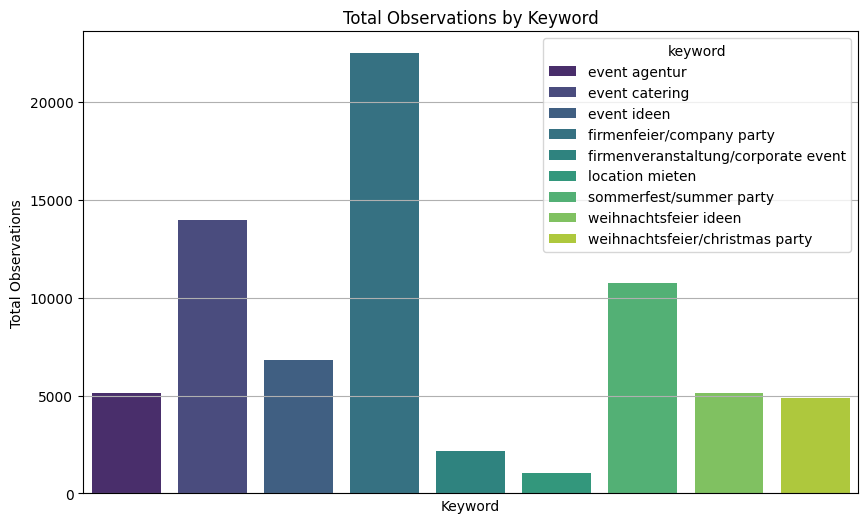

In [45]:
# Group data by keyword and sum observations
total_observations_agg = trends_agg_grouped.groupby('keyword')['observations'].sum().reset_index()

# Plot a bar chart of total observations by keyword
plt.figure(figsize=(10, 6))
sns.barplot(data=total_observations_agg, x='keyword', y='observations', palette='viridis', hue='keyword', dodge=False)
plt.title('Total Observations by Keyword')
plt.xlabel('Keyword')
plt.ylabel('Total Observations')
plt.xticks([])
plt.grid(axis='y')
plt.show()

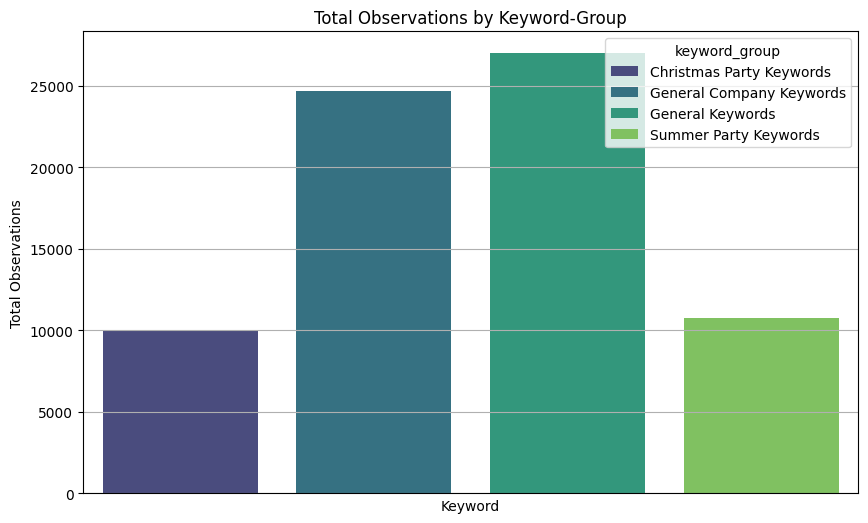

In [101]:
# Group data by keyword and sum observations
total_observations_agg = trends_agg_grouped.groupby('keyword_group')['observations'].sum().reset_index()

# Plot a bar chart of total observations by keyword
plt.figure(figsize=(10, 6))
sns.barplot(data=total_observations_agg, x='keyword_group', y='observations', palette='viridis', hue='keyword_group', dodge=False)
plt.title('Total Observations by Keyword-Group')
plt.xlabel('Keyword')
plt.ylabel('Total Observations')
plt.xticks([])
plt.grid(axis='y')
plt.show()

## Total Data Conclusion

- the observations for the keywords vary strongly and can not be compared to each other because we handle randomly picked keywords 
- the total data does not represent the importance of the event-categories as I did not cover all possible keywords but rather used random brainstormed keywords
- while the grouping to categories makes a lot of sense for improvint the readability for the following visualizations, the amount of observations in the categories in total over the whole time does not make sense and only shows its population to consider when analysing the following charts
- these charts can be used for setting up adverts if it gets extended by more keywords in the future
- at the first gaze we see, that seasonal keywords (summer/christmas) have about the same observations and general keywords (company and not company related) aswell 

## Seasonal Data

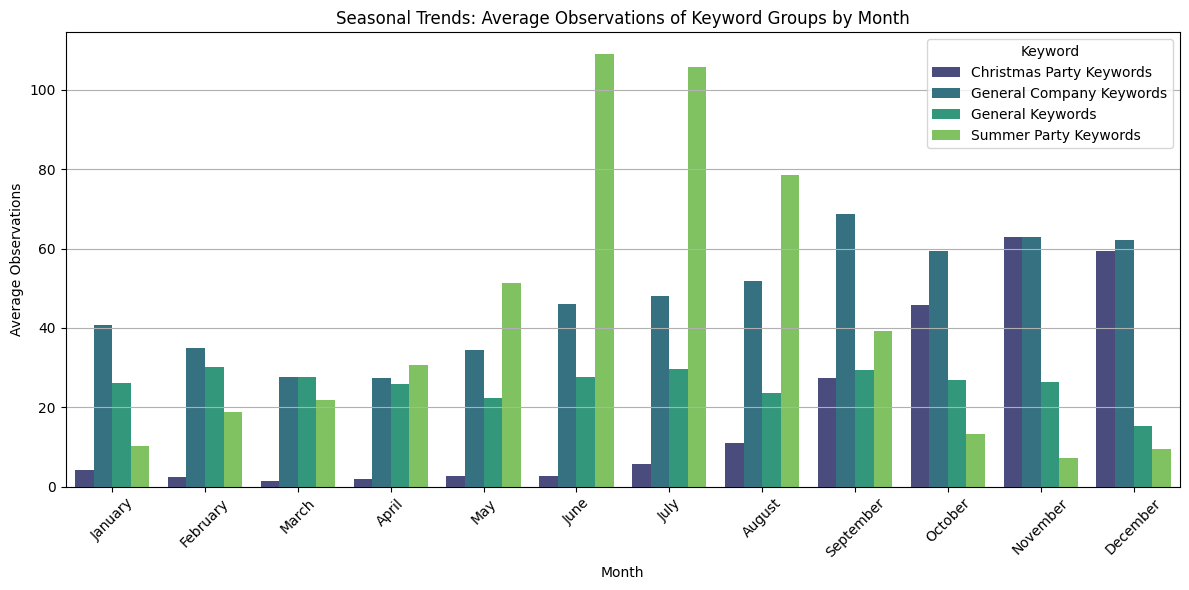

In [65]:
# Group by month and keyword to calculate average observations
seasonal_data_avg = trends_agg_grouped.groupby(['month', 'month_name', 'keyword_group'])['observations'].mean().reset_index()
seasonal_data_sum = trends_agg_grouped.groupby(['month', 'month_name', 'keyword_group'])['observations'].sum().reset_index()

# plot the seasonal trends as a barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=seasonal_data_avg, x='month_name', y='observations', hue='keyword_group', palette='viridis')

# improve readability
plt.title('Seasonal Trends: Average Observations of Keyword Groups by Month')
plt.xlabel('Month')
plt.ylabel('Average Observations')
plt.legend(title='Keyword')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


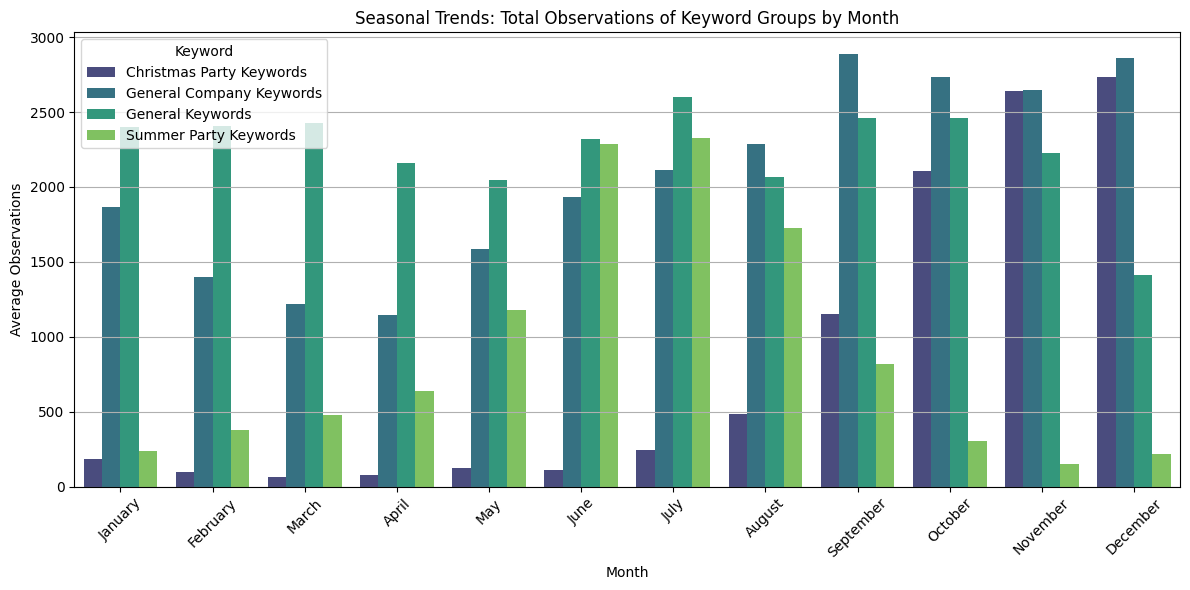

In [102]:
# plot the seasonal trends as a barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=seasonal_data_sum, x='month_name', y='observations', hue='keyword_group', palette='viridis')

# improve readability
plt.title('Seasonal Trends: Total Observations of Keyword Groups by Month')
plt.xlabel('Month')
plt.ylabel('Average Observations')
plt.legend(title='Keyword')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

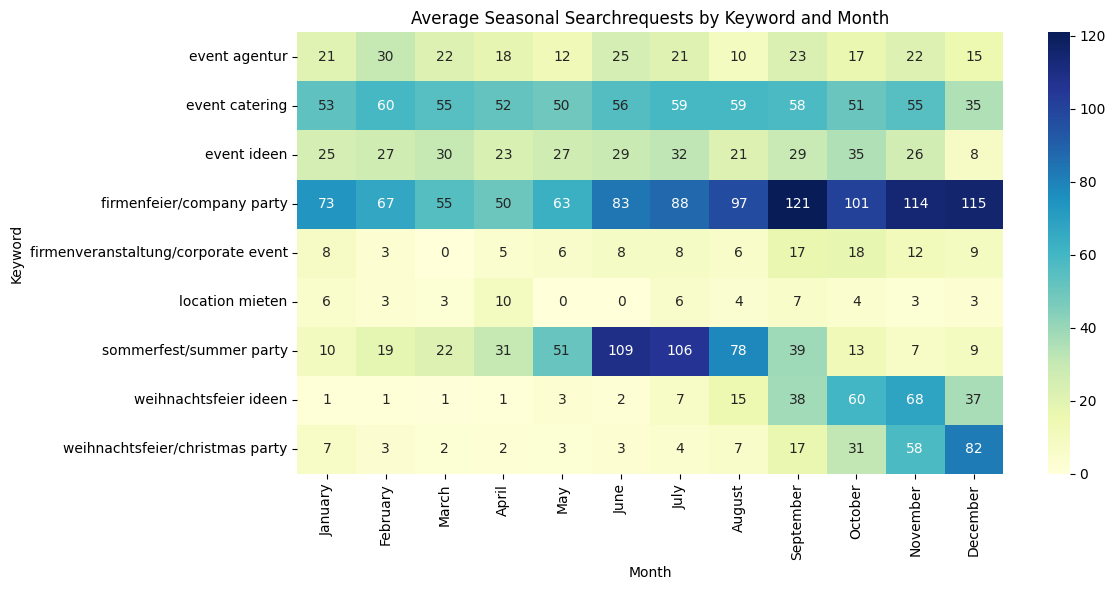

In [81]:
# create pivot table: Keywords x Months
heatmap_data = trends_agg_grouped.pivot_table(index=trends_agg_grouped['keyword'], 
                                              columns=trends_agg_grouped['month_name'], 
                                              values='observations', 
                                              aggfunc='mean')

# sort months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
heatmap_data = heatmap_data[month_order]

# plot: Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.0f')

plt.title('Average Seasonal Searchrequests by Keyword and Month')
plt.xlabel('Month')
plt.ylabel('Keyword')
plt.tight_layout()
plt.show()

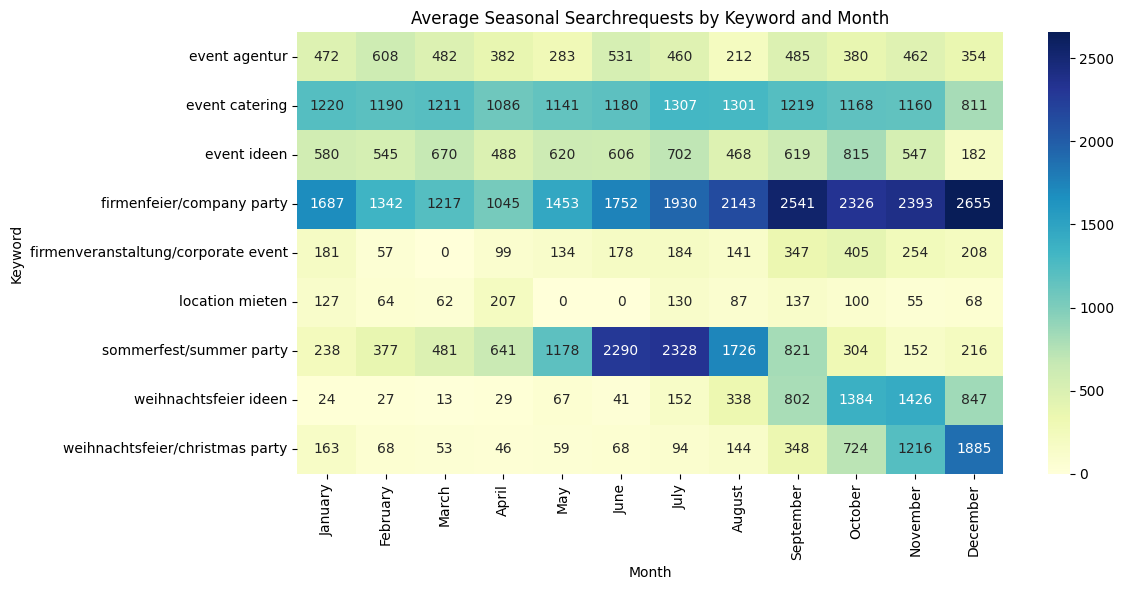

In [108]:
# create pivot table: Keywords x Months
heatmap_data = trends_agg_grouped.pivot_table(index=trends_agg_grouped['keyword'], 
                                              columns=trends_agg_grouped['month_name'], 
                                              values='observations', 
                                              aggfunc='sum')

# sort months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
heatmap_data = heatmap_data[month_order]

# plot: Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.0f')

plt.title('Average Seasonal Searchrequests by Keyword and Month')
plt.xlabel('Month')
plt.ylabel('Keyword')
plt.tight_layout()
plt.show()

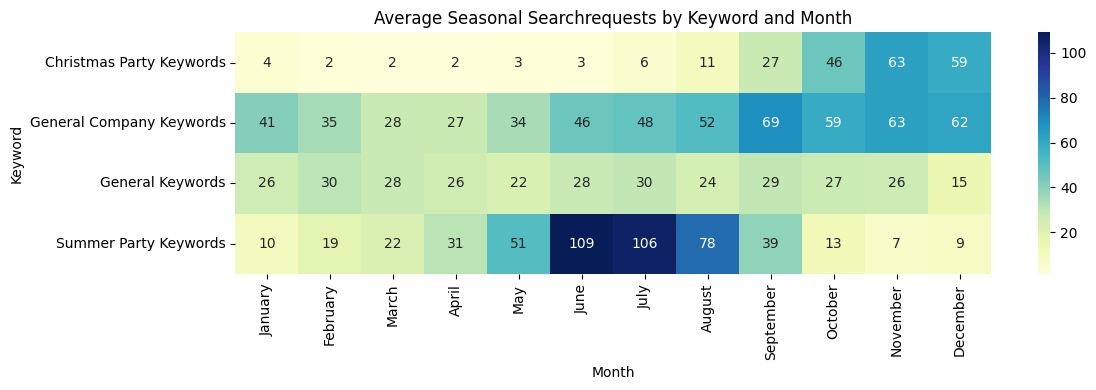

In [107]:
# create pivot table: Keywords x Months
heatmap_data_grouped = trends_agg_grouped.pivot_table(index=trends_agg_grouped['keyword_group'], 
                                              columns=trends_agg_grouped['month_name'], 
                                              values='observations', 
                                              aggfunc='mean')

# sort months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
heatmap_data_grouped = heatmap_data_grouped[month_order]

# plot: Heatmap
plt.figure(figsize=(12, 4))
sns.heatmap(heatmap_data_grouped, annot=True, cmap='YlGnBu', fmt='.0f')

plt.title('Total Seasonal Searchrequests by Keyword and Month')
plt.xlabel('Month')
plt.ylabel('Keyword')
plt.tight_layout()
plt.show()

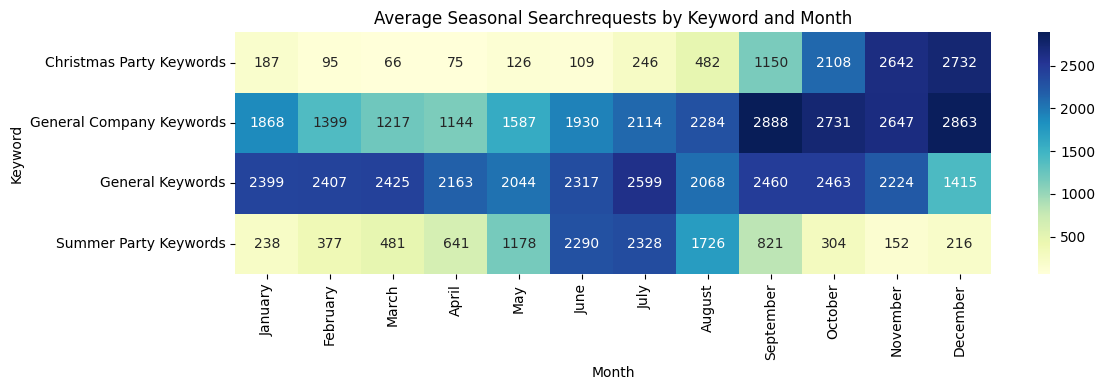

In [109]:
# create pivot table: Keywords x Months
heatmap_data_grouped = trends_agg_grouped.pivot_table(index=trends_agg_grouped['keyword_group'], 
                                              columns=trends_agg_grouped['month_name'], 
                                              values='observations', 
                                              aggfunc='sum')

# sort months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
heatmap_data_grouped = heatmap_data_grouped[month_order]

# plot: Heatmap
plt.figure(figsize=(12, 4))
sns.heatmap(heatmap_data_grouped, annot=True, cmap='YlGnBu', fmt='.0f')

plt.title('Total Seasonal Searchrequests by Keyword and Month')
plt.xlabel('Month')
plt.ylabel('Keyword')
plt.tight_layout()
plt.show()

## Seasonal Data Conclusion

We can see, that: 

- trends are best seen when the keywords are grouped to categories
- summerparty related keywords have a higher observation during the months: May, June, July and August
- christmasparty related keywords have a higher observation during the months: September, October, November, December
- general company party related keywords have a higher observation during the months: all months of christmas and summer party keywords (May - December) and additionally January
- general party related keywords have a lower observation during the month: December

Seasonal trends have a high impact to the search of keywords. If a product though is used for all kinds of company party, nearly all months are covered by potencial buyers. The months January - April are the ones with lower company related searches.

## Trend Data

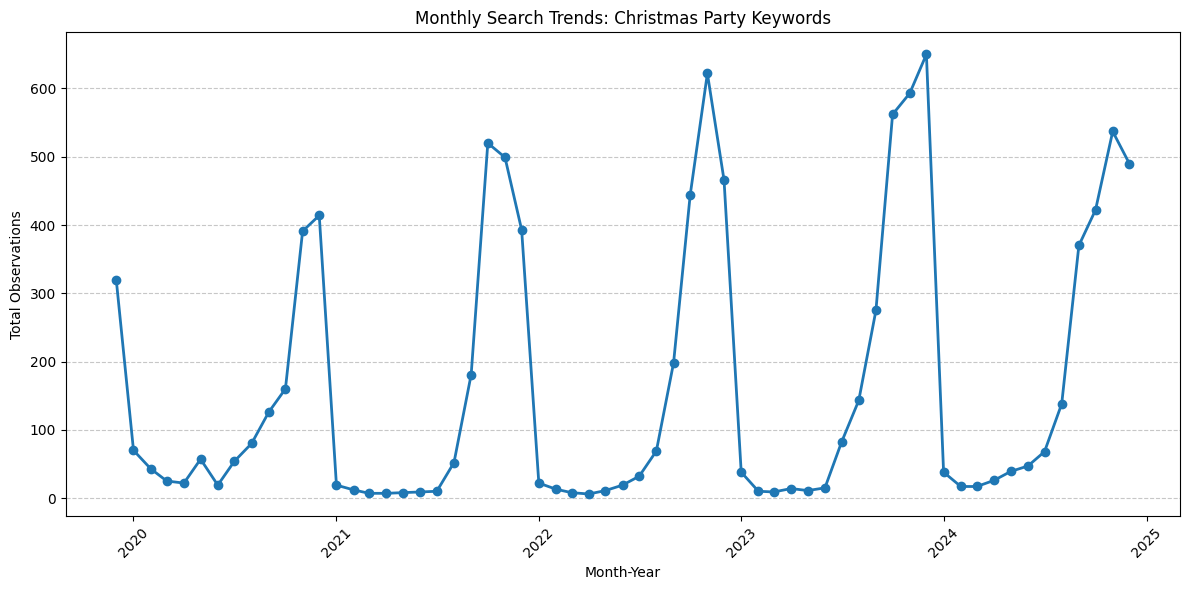

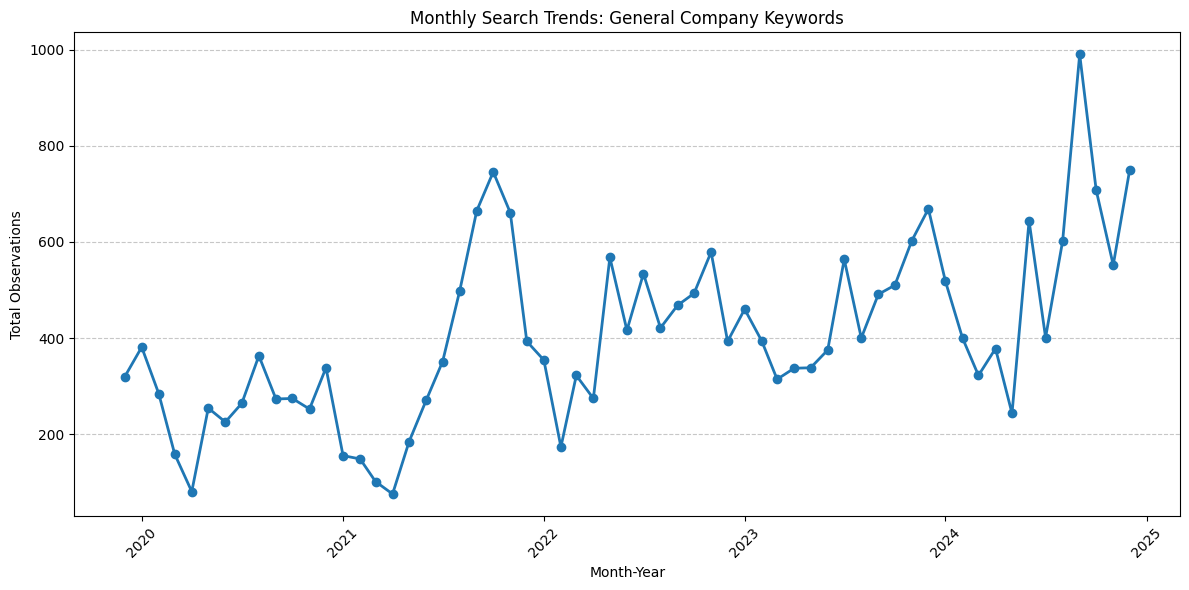

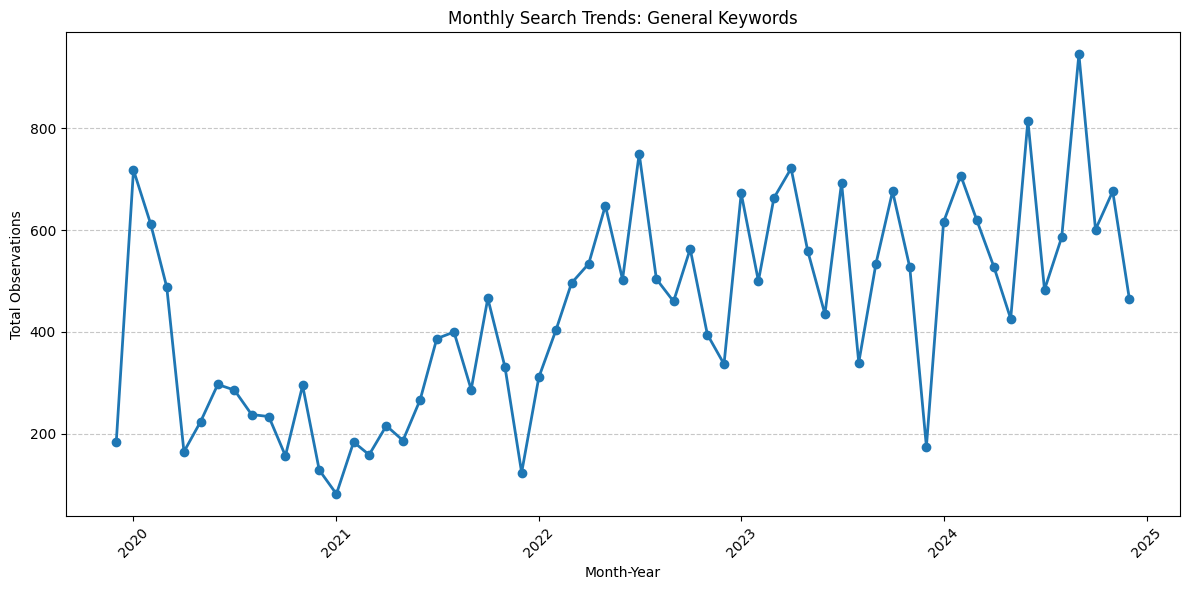

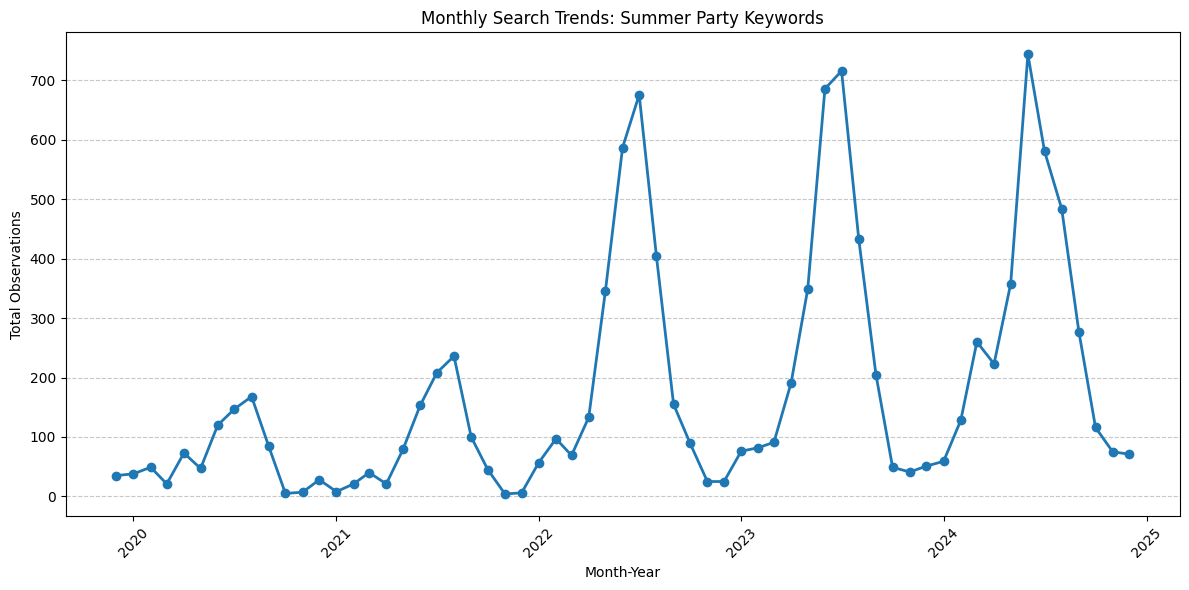

In [71]:
# Loop through each keyword group and create separate visuals
for group in monthly_data['keyword_group'].unique():
    group_data = monthly_data[monthly_data['keyword_group'] == group]

    # Create a separate plot for each group
    plt.figure(figsize=(12, 6))
    plt.plot(
        group_data['year_month'],
        group_data['observations'],
        marker='o',
        linewidth=2,
        label=group
    )
    
    # Customize the plot
    plt.title(f'Monthly Search Trends: {group}')
    plt.xlabel('Month-Year')
    plt.ylabel('Total Observations')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Show the plot
    plt.show()

## Trend Data Conclusion

- we see, that during covid time (2020-2023) company events were not as popular as it is since the regulations got canceled
- while summer party keywords were significantly lower in 2020 and 2021, compared to the next 3 years, the christmas party keywords dont show a significant drop (we expect that companies cut their events to host only the christmas party in the covid years)
- the usage of the general keywords and general company keywords does not show a clear trend but is increases over time (which can be explained by covid) and shows more usage towards the end of a year, especially in the years 2021, 2023 and 2024

## Geographical Data


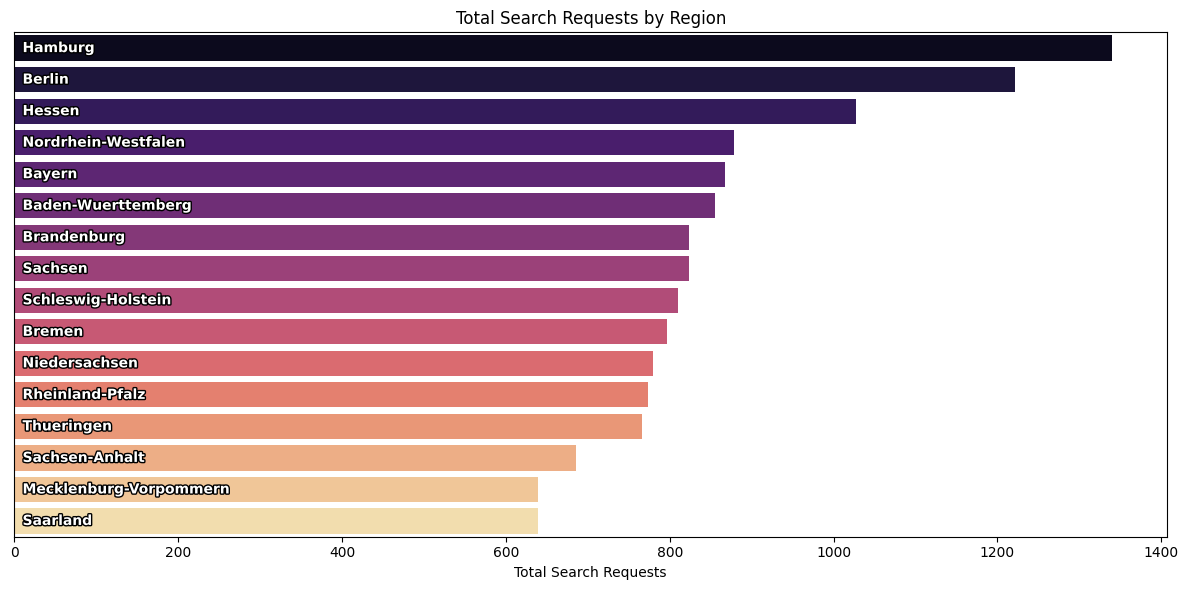

In [173]:
import matplotlib.patheffects as path_effects

# aggregate the data by region and sort by observations (highest to lowest)
regional_data = geotrends_agg_grouped.groupby('region', as_index=False)['observations'].sum()
regional_data = regional_data.sort_values(by='observations', ascending=False)

# plot: Horizontal Bar Plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=regional_data, y='region', x='observations', palette='magma')

# add state names (regions) inside the bars, with consistent left alignment
for bar, region in zip(barplot.patches, regional_data['region']):
    bar_x = 10  # Fixed position for all labels (consistent left alignment)
    bar_y = bar.get_y() + bar.get_height() / 2  # Center vertically
    
    # add text with a border
    text = plt.text(
        bar_x, bar_y, f'{region}',
        ha='left', va='center', color='white', fontsize=10, fontweight='bold'
    )
    # add black border to the text
    text.set_path_effects([
        path_effects.Stroke(linewidth=2, foreground='black'),  # Black border
        path_effects.Normal()  # Regular white text
    ])

# customize the plot
plt.title('Total Search Requests by Region')
plt.xlabel('Total Search Requests')

# remove Y-axis labels and ticks
plt.gca().set_yticks([])  # Remove tick labels
plt.gca().set_ylabel('')  # Remove axis label

plt.tight_layout()

# show the plot
plt.show()


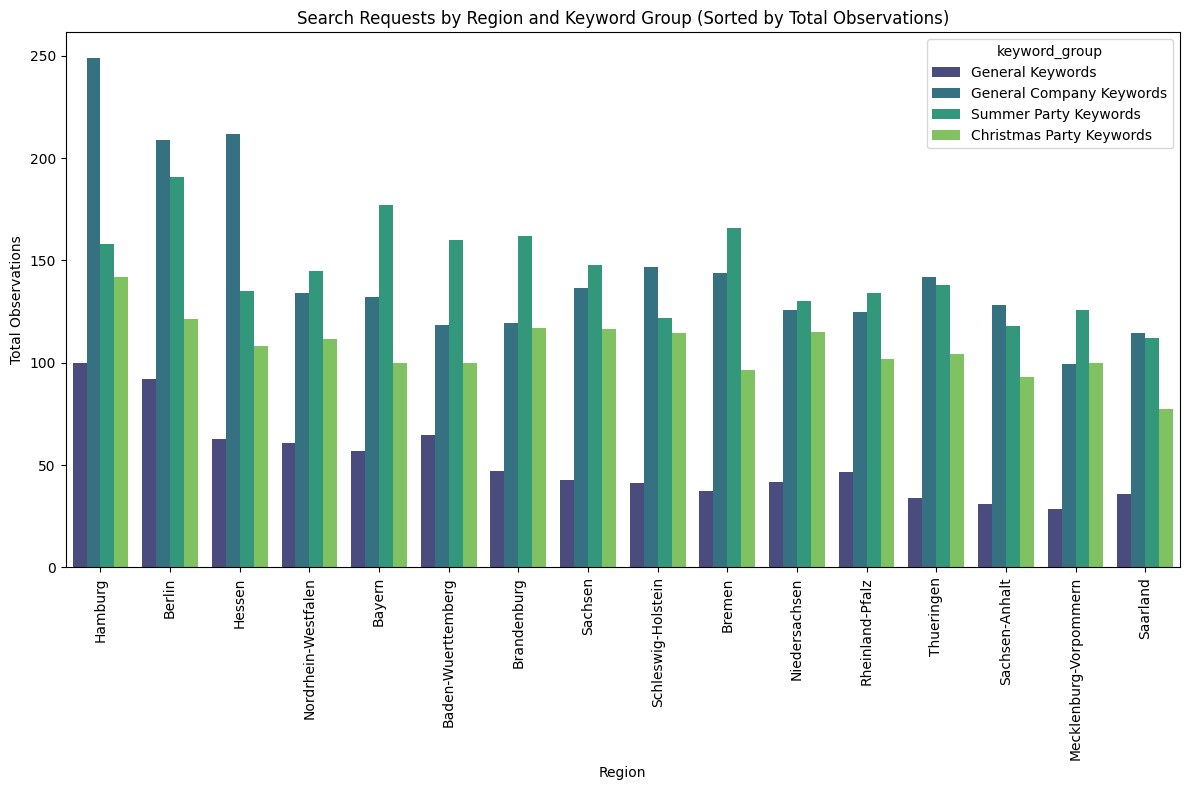

In [178]:
# ignore warning
import warnings
warnings.filterwarnings("ignore", message="The default of observed=False is deprecated")

# aggregate total observations by region
region_totals = geotrends_agg_grouped.groupby('region', as_index=False)['observations'].sum()
region_totals = region_totals.sort_values(by='observations', ascending=False)

# sort the original data by the sorted region order
sorted_regions = region_totals['region']
geotrends_sorted = geotrends_agg_grouped.copy()
geotrends_sorted['region'] = pd.Categorical(geotrends_sorted['region'], categories=sorted_regions, ordered=True)

# plot: Vertical Bar Plot
plt.figure(figsize=(12, 8))
sns.barplot(
    data=geotrends_sorted, 
    x='region', 
    y='observations', 
    hue='keyword_group', 
    palette='viridis', 
    errorbar=None  # Remove confidence intervals
)

# customize the plot
plt.title('Search Requests by Region and Keyword Group (Sorted by Total Observations)')
plt.xlabel('Region')
plt.ylabel('Total Observations')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()

# show the plot
plt.show()


## Geographical Data Conslusion

We can see that: 

- Hamburg, Hessen and Berlin have been the regions with a significant higher amount of observations of keywords over the last 5 years
- Sachsen Anhalt, Mecklemburg-Vorpommern and Saarland were slightly below the average regions for search requests
- this data is not cleaned to show the relation of the data to the population (people/companies) within the regions, but it shows the total numbers - probably explained by the population